In [1]:
from notebook.services.config import ConfigManager
cfm = ConfigManager()
cfm.update('livereveal', {'theme': 'simple',
 'transition': 'convex',
 'start_slideshow_at': 'selected'});

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.answers { 
    visibility: hidden;
}
</style>
""")

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
G:\Dropbox\2016\Conference\cmas\python class\tutorial_test\RAQMSandPython\working


In [4]:
import pandas as pd
ga_em_df = pd.read_csv("./pandas/ga_2014_nei_v2.csv")

In [5]:
ga_em_df.head()

,FIPS,SCC,POLLUTANT,E2011,E2014
0,13001,2102001000,NH3,0.000000,0.000000
1,13001,2102002000,NH3,0.000000,NaN
2,13001,2102004000,NH3,0.027775,0.000000
3,13001,2102004001,NH3,NaN,0.006860
4,13001,2102004002,NH3,NaN,0.004574


In [6]:
sum_by_pol_df = pd.pivot_table(ga_em_df, index="POLLUTANT", values="E2011", aggfunc=sum)#default aggfunc="mean"

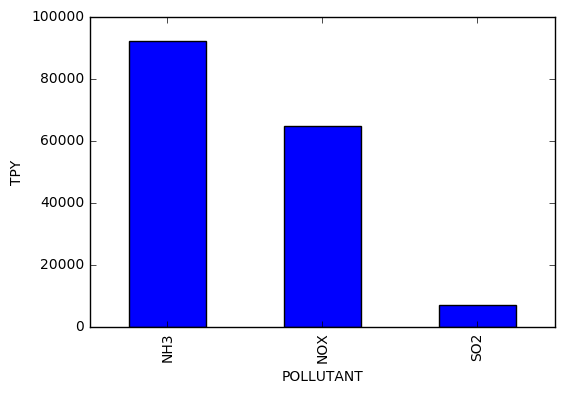

In [7]:
bar_plot = sum_by_pol_df.plot.bar()
bar_plot.set_ylabel("TPY")
bar_plot.set_xlabel("POLLUTANT")

In [8]:
scc_df = pd.read_csv("./pandas/source_classification_codes.csv")
scc_df.head()

,Data Category,Code,SCC Level One,SCC Level Two,SCC Level Three,SCC Level Four,Map To,Last Inventory Year,Option Group,Option Set,Sector,ERT Valid,Short Name,Usage Notes,Last Updated Date,Tier 1 Description,Tier 2 Description,Tier 3 Description,Activity Value Required for this SCC?:
0,Point,10100101,External Combustion Boilers,Electric Generation,"Anthracite Coal, Pulverized",Boiler,NaN,NaN,NaN,NaN,Fuel Comb - Electric Generation - Coal,Yes,NaN,NaN,2016-03-03,Fuel Comb. Elec. Util.,Coal,Anthracite & Lignite,No
1,Point,10100102,External Combustion Boilers,Electric Generation,Anthracite Coal,"Boiler, Traveling Grate (Overfeed) Stoker",NaN,NaN,NaN,NaN,Fuel Comb - Electric Generation - Coal,Yes,NaN,NaN,2013-02-27,Fuel Comb. Elec. Util.,Coal,Anthracite & Lignite,No
2,Point,10100201,External Combustion Boilers,Electric Generation,"Bituminous Coal, Pulverized","Boiler, Wet Bottom",NaN,NaN,NaN,NaN,Fuel Comb - Electric Generation - Coal,Yes,NaN,NaN,2013-04-15,Fuel Comb. Elec. Util.,Coal,Bituminous,No
3,Point,10100202,External Combustion Boilers,Electric Generation,"Bituminous Coal, Pulverized","Boiler, Dry Bottom",NaN,NaN,NaN,NaN,Fuel Comb - Electric Generation - Coal,Yes,NaN,NaN,2013-04-15,Fuel Comb. Elec. Util.,Coal,Bituminous,No
4,Point,10100203,External Combustion Boilers,Electric Generation,Bituminous Coal,"Boiler, Cyclone Furnace",NaN,NaN,NaN,NaN,Fuel Comb - Electric Generation - Coal,Yes,NaN,NaN,2013-04-15,Fuel Comb. Elec. Util.,Coal,Bituminous,No


In [9]:
merged_df1 = pd.merge(ga_em_df, scc_df, left_on="SCC", right_on="Code")#how="inner","left","right","outer"; default="inner"
merged_df1.head()

,FIPS,SCC,POLLUTANT,E2011,E2014,Data Category,Code,SCC Level One,SCC Level Two,SCC Level Three,...,Option Set,Sector,ERT Valid,Short Name,Usage Notes,Last Updated Date,Tier 1 Description,Tier 2 Description,Tier 3 Description,Activity Value Required for this SCC?:
0,13001,2102001000,NH3,0.0,0.0,Nonpoint,2102001000,Stationary Source Fuel Combustion,Industrial,Anthracite Coal,...,NaN,"Fuel Comb - Industrial Boilers, ICEs - Coal",NaN,Fuel Combustion; Industrial; Anthr Coal,NaN,2015-04-21,Fuel Comb. Industrial,Coal,Anthracite & Lignite,No
1,13001,2102001000,NOX,0.0,0.0,Nonpoint,2102001000,Stationary Source Fuel Combustion,Industrial,Anthracite Coal,...,NaN,"Fuel Comb - Industrial Boilers, ICEs - Coal",NaN,Fuel Combustion; Industrial; Anthr Coal,NaN,2015-04-21,Fuel Comb. Industrial,Coal,Anthracite & Lignite,No
2,13001,2102001000,SO2,0.0,0.0,Nonpoint,2102001000,Stationary Source Fuel Combustion,Industrial,Anthracite Coal,...,NaN,"Fuel Comb - Industrial Boilers, ICEs - Coal",NaN,Fuel Combustion; Industrial; Anthr Coal,NaN,2015-04-21,Fuel Comb. Industrial,Coal,Anthracite & Lignite,No
3,13003,2102001000,NH3,0.0,0.0,Nonpoint,2102001000,Stationary Source Fuel Combustion,Industrial,Anthracite Coal,...,NaN,"Fuel Comb - Industrial Boilers, ICEs - Coal",NaN,Fuel Combustion; Industrial; Anthr Coal,NaN,2015-04-21,Fuel Comb. Industrial,Coal,Anthracite & Lignite,No
4,13003,2102001000,NOX,0.0,0.0,Nonpoint,2102001000,Stationary Source Fuel Combustion,Industrial,Anthracite Coal,...,NaN,"Fuel Comb - Industrial Boilers, ICEs - Coal",NaN,Fuel Combustion; Industrial; Anthr Coal,NaN,2015-04-21,Fuel Comb. Industrial,Coal,Anthracite & Lignite,No


In [10]:
sum_by_pol_df = pd.pivot_table(ga_em_df, index="SCC", columns="POLLUTANT", values="E2011", aggfunc=sum)

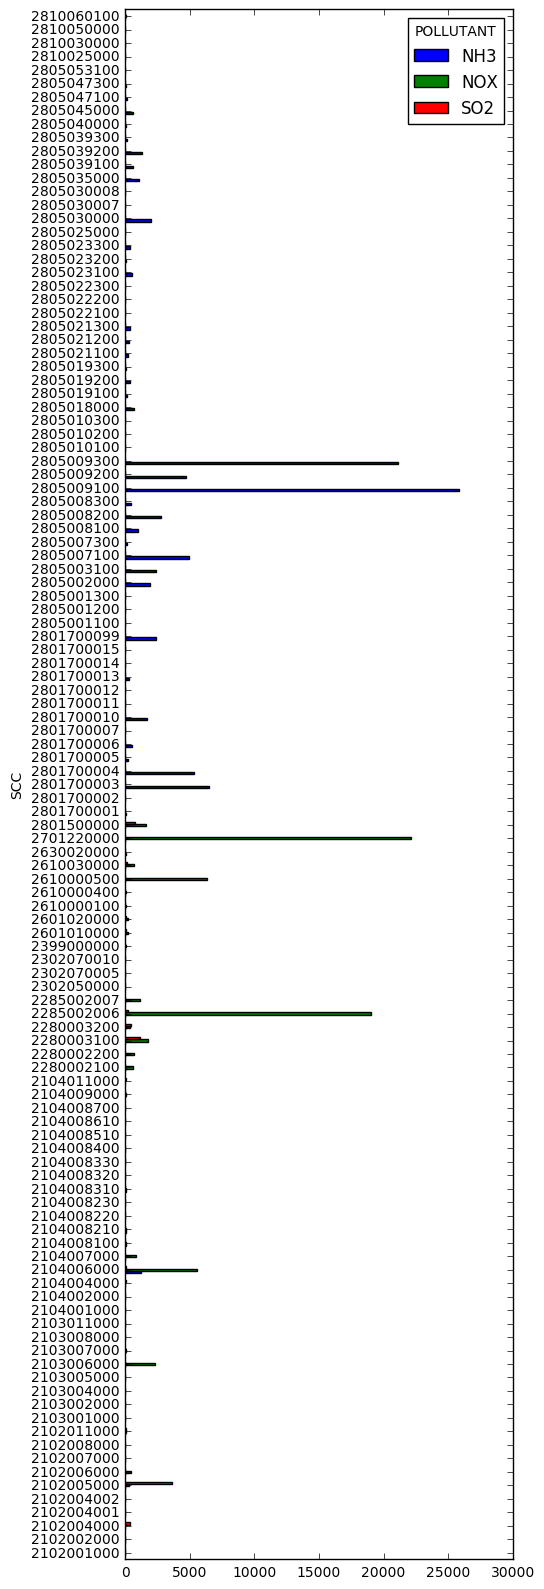

In [11]:
barh_plot = sum_by_pol_df.plot.barh();
barh_plot.figure.set_size_inches(5,20)

In [12]:
this_scc = 2285002006
ga_em_df_subset = pd.DataFrame(ga_em_df[ga_em_df["SCC"]==this_scc])
ga_em_df_subset["POLLUTANT"].drop_duplicates()

34     NH3
126    NOX
172    SO2
Name: POLLUTANT, dtype: object

In [13]:
print(ga_em_df_subset.columns)
ga_em_df_subset.loc[:,"dE2014_E2011"] = (ga_em_df_subset.loc[:,"E2014"] - ga_em_df_subset.loc[:,"E2011"]).values

Index(['FIPS', 'SCC', 'POLLUTANT', 'E2011', 'E2014'], dtype='object')


In [14]:
dE_df = pd.pivot_table(ga_em_df_subset, index="FIPS", columns="POLLUTANT", values="dE2014_E2011")

In [15]:
dE_df.columns

Index(['NH3', 'NOX', 'SO2'], dtype='object', name='POLLUTANT')

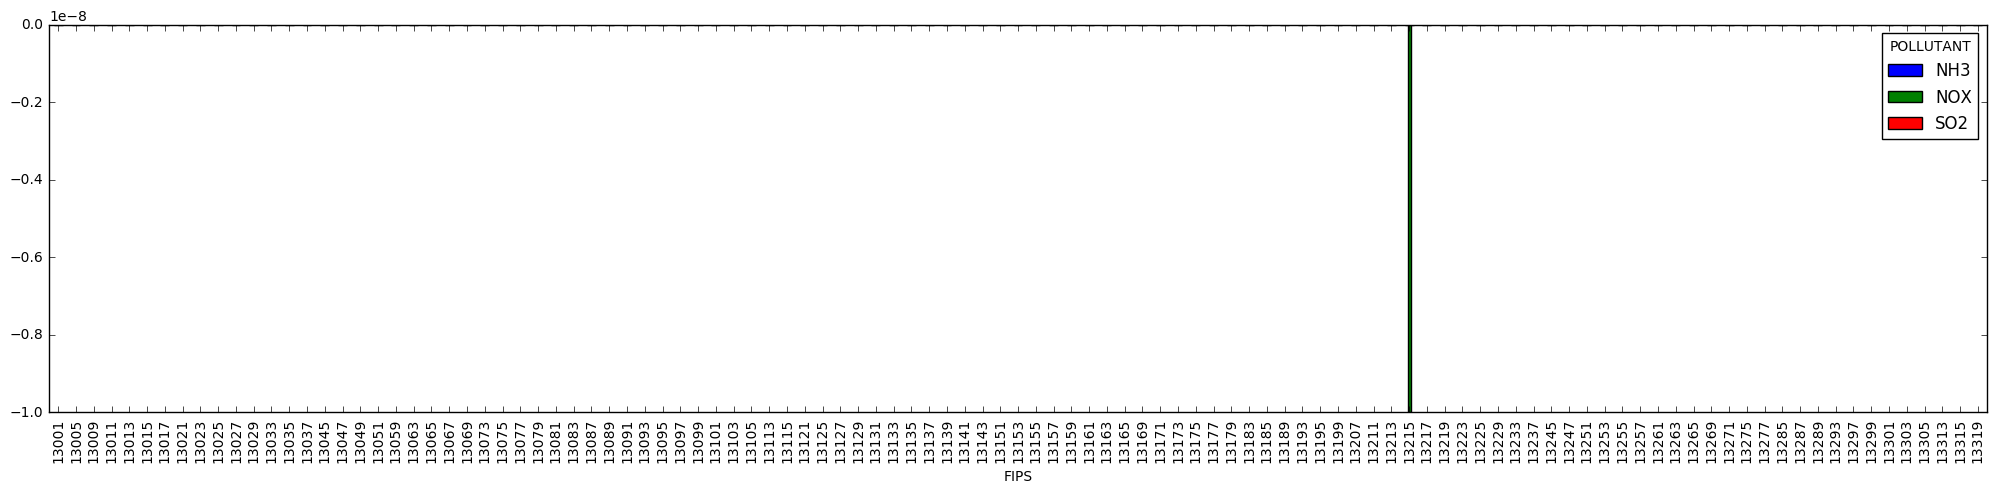

In [16]:
dE_df_plot = dE_df.plot.bar();
dE_df_plot.figure.set_size_inches(25,5)

In [17]:
mdf1 = merged_df1[merged_df1["SCC"]==this_scc]
mdf1.head()

,FIPS,SCC,POLLUTANT,E2011,E2014,Data Category,Code,SCC Level One,SCC Level Two,SCC Level Three,...,Option Set,Sector,ERT Valid,Short Name,Usage Notes,Last Updated Date,Tier 1 Description,Tier 2 Description,Tier 3 Description,Activity Value Required for this SCC?:
16218,13001,2285002006,NH3,0.017473,0.017473,Nonpoint,2285002006,Mobile Sources,Railroad Equipment,Diesel,...,NaN,Mobile - Locomotives,NaN,NaN,NaN,2012-03-14,Off-Highway,Railroads,Other,No
16219,13001,2285002006,NOX,34.626463,34.626463,Nonpoint,2285002006,Mobile Sources,Railroad Equipment,Diesel,...,NaN,Mobile - Locomotives,NaN,NaN,NaN,2012-03-14,Off-Highway,Railroads,Other,No
16220,13001,2285002006,SO2,0.394341,0.394341,Nonpoint,2285002006,Mobile Sources,Railroad Equipment,Diesel,...,NaN,Mobile - Locomotives,NaN,NaN,NaN,2012-03-14,Off-Highway,Railroads,Other,No
16221,13005,2285002006,NH3,0.035434,0.035434,Nonpoint,2285002006,Mobile Sources,Railroad Equipment,Diesel,...,NaN,Mobile - Locomotives,NaN,NaN,NaN,2012-03-14,Off-Highway,Railroads,Other,No
16222,13005,2285002006,NOX,80.937200,80.937200,Nonpoint,2285002006,Mobile Sources,Railroad Equipment,Diesel,...,NaN,Mobile - Locomotives,NaN,NaN,NaN,2012-03-14,Off-Highway,Railroads,Other,No


In [18]:
mdf1.to_csv("test_out.csv")